In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy
import os
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential
from tensorflow.keras. layers import Dense, Dropout, Activation 
from tensorflow.keras.layers import Embedding 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Conv1D, MaxPooling1D 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.layers import Bidirectional

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 학습셋, 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=200)
x_test = sequence.pad_sequences(x_test, maxlen=200)
# 모델의 설정
model = Sequential()
model.add(Embedding(10000, 200))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# 모델의 요약을 보기 위해 한 번 모델을 호출하여 초기화합니다
model.build(input_shape=(None, 100))
model.summary()
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 200)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 200)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 64)         │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 24, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,393 (8.28 MB)

 Trainable params: 2,171,393 (8.28 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=64, epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])
# 테스트 정확도 출력
print("\n Test accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 그래프 그리기
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7133 - loss: 0.5023
Epoch 1: val_loss improved from inf to 0.26974, saving model to best_model.keras
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.7136 - loss: 0.5019 - val_accuracy: 0.8882 - val_loss: 0.2697
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9129 - loss: 0.2231
Epoch 2: val_loss did not improve from 0.26974
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 111ms/step - accuracy: 0.9129 - loss: 0.2231 - val_accuracy: 0.8805 - val_loss: 0.2957
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9432 - loss: 0.1553
Epoch 3: val_loss did not improve from 0.26974
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.9432 - loss: 0.1552 - val_accuracy: 0.8627 - val_loss: 0.4083
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9586 - loss: 0.1166
Epoch 4: val_loss did not improve from 0.26974
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 116ms/step - accuracy: 0.9586 - loss: 

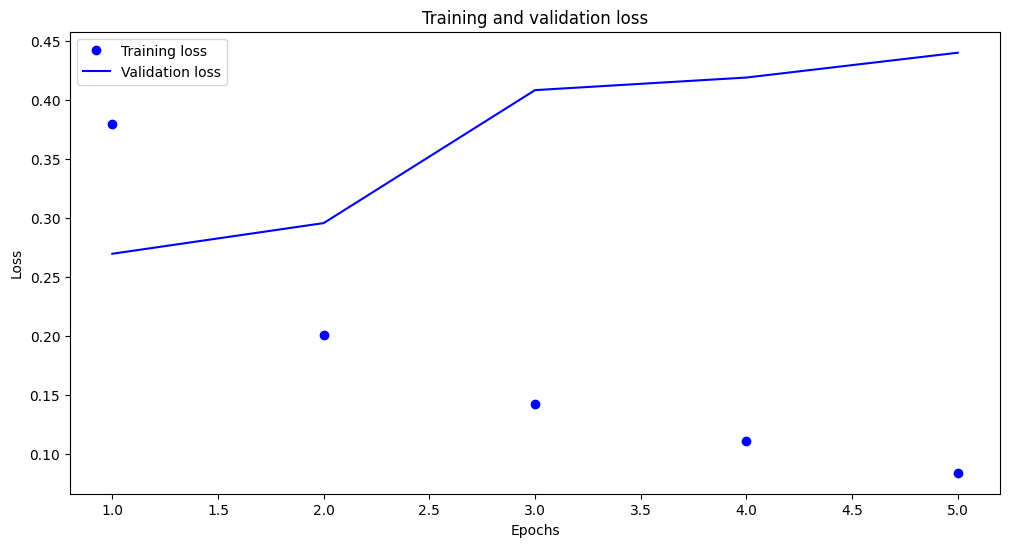

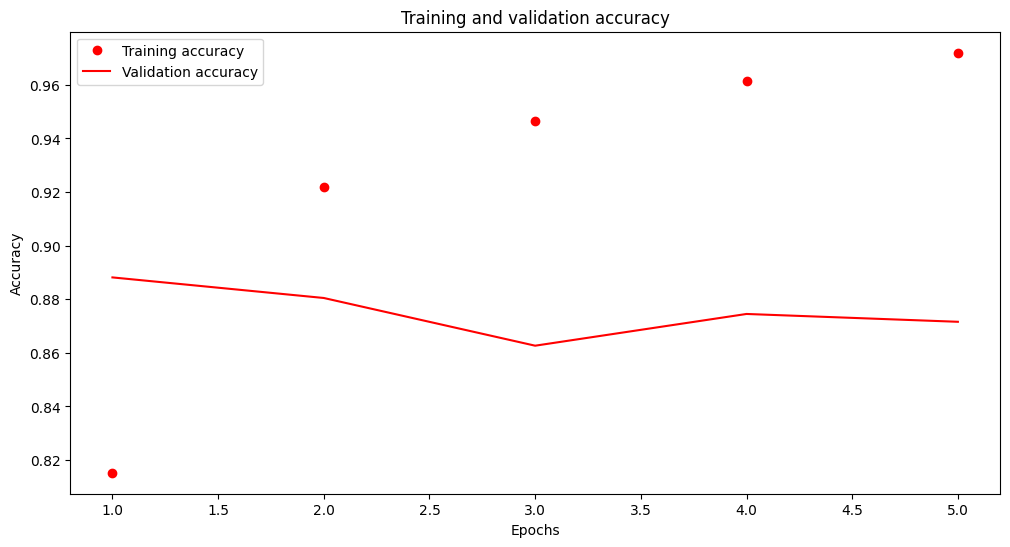

In [5]:
# 손실 그래프
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()